# Notebook 00

# Tracking project example

This series of Notebooks will take you through the main steps to train a U-net to track objects in images.

As a toy example, we will track human fingers in a video. You can download the video here:  

https://drive.google.com/file/d/1ezrMsINCKPN85O4H71IKKd5cD8u4CE2M/view?usp=drive_link

The notebook uses several Python objects from the unetTracker package. You can find the code related to these objects in the folder `unetTracker` in the unetTracker repository.

# Google Drive and Google Colab

We will be using Google Colab for all the steps.

I recommand to create a folder called `dsfolder` at the root of your Google Drive. This folder will be used to save your tracking project.

You should also put all the files from the `unetTracker/tracking_project_notebooks_colab` into the dsfolder.

Make sure that your **Runtime session type** is not CPU.

# Creating a tracking project

The configuration and dataset for your project will be saved in a directory.

The `unetTracker.trackingProject.TrackingProject` object will load the configuration from your project directory.

The project directory will be several 100 Mb after you label many images used to train your model.

The configuration is saved to and loaded from a file called `config.yalm`. This file is located in your project directory. You can edit this file manually if needed and reload the configuration from the file.

You only need to run this notebook once when you create your project. If you have done it before, skip this notebook.

## Install unetTracker

Install the dependency, including unetTracker.

Don't forget to restart the Runtime after the installation.

In [1]:
!pip install albumentations==1.3.0
!git clone https://github.com/kevin-allen/unetTracker
!pip install -r unetTracker/requirements.txt
!pip install -e unetTracker

Cloning into 'unetTracker'...
remote: Enumerating objects: 1018, done.
remote: Counting objects: 100% (397/397), done.
remote: Compressing objects: 100% (193/193), done.
remote: Total 1018 (delta 231), reused 347 (delta 202), pack-reused 621 (from 1)
Receiving objects: 100% (1018/1018), 126.50 MiB | 19.39 MiB/s, done.
Resolving deltas: 100% (621/621), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 12.3 MB/s eta 0:00:00
   ━

You now need to **restart your runtime** to be able to use unet-tracker. You can press the button above.

We are now going to mount your Google Drive so that we can create a directory for your tracking project Running the code below should open a window in your browser and you will need to give permission to Google Colab to access Google Drive.

In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
fn = "/content/drive/My Drive/dsfolder"
if os.path.exists(fn):
  print("We can access the dsfolder directory.")
else:
  raise IOError("Problem accessing the dsfolder directory.")

We can access the dsfolder directory.


If you create a TrackingProject and give an `object_list`, the codes assumes that you want to create a new project.

In [3]:
from unetTracker.trackingProject import TrackingProject

You can create a directory where you will store your unetTracker projects.


In [4]:
root_path = "/content/drive/My Drive/dsfolder/trackingProjects"
if not os.path.exists(root_path):
    print("creating",root_path)
    os.makedirs(root_path)
else:
    print(root_path, "already exists")
    print("If you have already created your project in the past and adjusted the configuration, you don't need to run this notebook again")

/content/drive/My Drive/dsfolder/trackingProjects already exists
If you have already created your project in the past and adjusted the configuration, you don't need to run this notebook again


You can now create a TrackingProject object.

Set a meaningful name for your project and list the object/body parts that you want to track. I usually track as few objects as required.

The radius is determining the size of the markers that the model will try to track. It can be changed later on.

In [5]:
project = TrackingProject(name="finger_tracker",
                          root_folder = root_path,
                          object_list=["f1","f2","f3","f4"],
                          target_radius=6)

Project directory: /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker


/content/unetTracker/unetTracker/trackingProject.py:78: UserWarning: The directory /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker already exist.
 If you run save_configuration() you will overwrite the previous configuration.
  warnings.warn("The directory {} already exist.\n If you run save_configuration() you will overwrite the previous configuration.".format(self.project_dir))


You can now create the project directories and save a default configuration file.

## Warning

If you already have a project directory and have edited the configuration file, running the cell below will overwrite your old configuration.

If you are working with a new project, go ahead and create directories and save the default configuration.

In [ ]:
#project.create_project_directories()
#project.save_configuration()

Create /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker1
Create /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker1/dataset
Create /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker1/dataset/images
Create /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker1/dataset/coordinates
Create /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker1/dataset/masks
Create /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker1/models
Create /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker1/augmentation
Create /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker1/videos
Saving /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker1/config.yalm


You can inspect at your project directory.

In [6]:
print("Project directory:", project.project_dir)
print("Files and subdirectories inside your project directory:",os.listdir(project.project_dir))

Project directory: /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker
Files and subdirectories inside your project directory: ['dataset', 'models', 'augmentation', 'videos', 'extracted_frames', 'config.yalm']


## Edit your config.yalm file

You can now edit the `config.yalm` file. You can use your favorite text editor to inspect or edit your `config.yalm`.

When you are done you can load the new configuration from file.

Make sure you set the correct size for your images. If you are using the `human_hand.mp4`, the image size is 270 by 480

* image_size (first value is height, second value is width)

The image_size will have a strong effect on how fast the model will run. Larger images will be much slower to process. I would recommend using images that are not larger than 480x640.

Also, if you have body parts that are characterized by left/right, set `augmentation_HorizontalFlipProb: 0.0`.


In [7]:
project.load_configuration()

Loading /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/config.yalm
{'augmentation_HorizontalFlipProb': 0.5, 'augmentation_RandomBrightnessContrastProb': 0.2, 'augmentation_RandomSizedCropProb': 1.0, 'augmentation_RotateProb': 0.3, 'image_extension': '.png', 'image_size': [270, 480], 'labeling_ImageEnlargeFactor': 2.0, 'name': 'finger_tracker', 'normalization_values': {'means': [0.40664952993392944, 0.4527093172073364, 0.5142642259597778], 'stds': [0.2394399791955948, 0.2509937286376953, 0.26815035939216614]}, 'object_colors': [(0.0, 0.0, 255.0), (255.0, 0.0, 0.0), (255.0, 255.0, 0.0), (240.0, 255.0, 255.0)], 'objects': ['f1', 'f2', 'f3', 'f4'], 'target_radius': 6, 'unet_features': [64, 128, 256, 512]}


The configuration that is in the `config.yalm` is stored in `project.configDict`

In [8]:
project.configDict

{'augmentation_HorizontalFlipProb': 0.5,
 'augmentation_RandomBrightnessContrastProb': 0.2,
 'augmentation_RandomSizedCropProb': 1.0,
 'augmentation_RotateProb': 0.3,
 'image_extension': '.png',
 'image_size': [270, 480],
 'labeling_ImageEnlargeFactor': 2.0,
 'name': 'finger_tracker',
 'normalization_values': {'means': [0.40664952993392944,
   0.4527093172073364,
   0.5142642259597778],
  'stds': [0.2394399791955948, 0.2509937286376953, 0.26815035939216614]},
 'object_colors': [(0.0, 0.0, 255.0),
  (255.0, 0.0, 0.0),
  (255.0, 255.0, 0.0),
  (240.0, 255.0, 255.0)],
 'objects': ['f1', 'f2', 'f3', 'f4'],
 'target_radius': 6,
 'unet_features': [64, 128, 256, 512]}

## Creating a TrackingProject object from an existing project config.yalm file

The next time you want to create a TrackingProject object for your existing project, you can simply point to the existing project directory.

Because there is no object list given as argument, the code will look for an existing project and automatically load the configuration from file.

This is how you will create the TrackingProject object in the following notebooks.

In [9]:
model_name = "finger_tracker"
root_path = "/content/drive/My Drive/dsfolder/trackingProjects"
project = TrackingProject(name=model_name,root_folder = root_path)

Project directory: /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker
Getting configuration from config file. Values from config file will be used.
Loading /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/config.yalm
{'augmentation_HorizontalFlipProb': 0.5, 'augmentation_RandomBrightnessContrastProb': 0.2, 'augmentation_RandomSizedCropProb': 1.0, 'augmentation_RotateProb': 0.3, 'image_extension': '.png', 'image_size': [270, 480], 'labeling_ImageEnlargeFactor': 2.0, 'name': 'finger_tracker', 'normalization_values': {'means': [0.40664952993392944, 0.4527093172073364, 0.5142642259597778], 'stds': [0.2394399791955948, 0.2509937286376953, 0.26815035939216614]}, 'object_colors': [(0.0, 0.0, 255.0), (255.0, 0.0, 0.0), (255.0, 255.0, 0.0), (240.0, 255.0, 255.0)], 'objects': ['f1', 'f2', 'f3', 'f4'], 'target_radius': 6, 'unet_features': [64, 128, 256, 512]}


In [10]:
project.configDict

{'augmentation_HorizontalFlipProb': 0.5,
 'augmentation_RandomBrightnessContrastProb': 0.2,
 'augmentation_RandomSizedCropProb': 1.0,
 'augmentation_RotateProb': 0.3,
 'image_extension': '.png',
 'image_size': [270, 480],
 'labeling_ImageEnlargeFactor': 2.0,
 'name': 'finger_tracker',
 'normalization_values': {'means': [0.40664952993392944,
   0.4527093172073364,
   0.5142642259597778],
  'stds': [0.2394399791955948, 0.2509937286376953, 0.26815035939216614]},
 'object_colors': [(0.0, 0.0, 255.0),
  (255.0, 0.0, 0.0),
  (255.0, 255.0, 0.0),
  (240.0, 255.0, 255.0)],
 'objects': ['f1', 'f2', 'f3', 'f4'],
 'target_radius': 6,
 'unet_features': [64, 128, 256, 512]}

## Adjust your setup_project.py file

At the beginning of all subsequent notebooks, we will load our project from the project directory we just created.

To avoid having to remember all the details on how this is done, we can just put the code in a file called `setup_project.py` that is found in the same directory as the notebooks. At the begining of each subsequent notebook, we will execute this code.

Go ahead and adjust the `setup_project.py` so that its content points to your project directory. Once you are done, you can run the code below to load your project.

In [11]:
# this will run the code in the setup_project.py and create a variable called `project`
%run "/content/drive/My Drive/dsfolder/setup_project.py"

Project directory: /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker
Getting configuration from config file. Values from config file will be used.
Loading /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/config.yalm
{'augmentation_HorizontalFlipProb': 0.5, 'augmentation_RandomBrightnessContrastProb': 0.2, 'augmentation_RandomSizedCropProb': 1.0, 'augmentation_RotateProb': 0.3, 'image_extension': '.png', 'image_size': [270, 480], 'labeling_ImageEnlargeFactor': 2.0, 'name': 'finger_tracker', 'normalization_values': {'means': [0.40664952993392944, 0.4527093172073364, 0.5142642259597778], 'stds': [0.2394399791955948, 0.2509937286376953, 0.26815035939216614]}, 'object_colors': [(0.0, 0.0, 255.0), (255.0, 0.0, 0.0), (255.0, 255.0, 0.0), (240.0, 255.0, 255.0)], 'objects': ['f1', 'f2', 'f3', 'f4'], 'target_radius': 6, 'unet_features': [64, 128, 256, 512]}


# Notebook 01

## Extract images from a video and add them to a dataset

Here we want to get some images that will be used to create our dataset of labelled images.

In this notebook, we extract some images from a video and label these images.

You probably want to have at least 300-500 images in your dataset to build a reliable model. You can start with 150-200 images and go through all Notebooks. You can always add more images and re-train your network later.

Get a minimum of 150 images to get started.

In [12]:
%matplotlib widget

import glob
from unetTracker.dataset import UNetDataset
from unetTracker.camera import USBCamera, bgr8_to_jpeg
from unetTracker.unetGUI import LabelFromImagesGUI

## Inspect your project object

Make sure you have the configuration for your project.

In [13]:
project.configDict

{'augmentation_HorizontalFlipProb': 0.5,
 'augmentation_RandomBrightnessContrastProb': 0.2,
 'augmentation_RandomSizedCropProb': 1.0,
 'augmentation_RotateProb': 0.3,
 'image_extension': '.png',
 'image_size': [270, 480],
 'labeling_ImageEnlargeFactor': 2.0,
 'name': 'finger_tracker',
 'normalization_values': {'means': [0.40664952993392944,
   0.4527093172073364,
   0.5142642259597778],
  'stds': [0.2394399791955948, 0.2509937286376953, 0.26815035939216614]},
 'object_colors': [(0.0, 0.0, 255.0),
  (255.0, 0.0, 0.0),
  (255.0, 255.0, 0.0),
  (240.0, 255.0, 255.0)],
 'objects': ['f1', 'f2', 'f3', 'f4'],
 'target_radius': 6,
 'unet_features': [64, 128, 256, 512]}

## Create a dataset to store labeled images

Create a dataset for the project.

In [14]:
dataset = UNetDataset(image_dir=project.image_dir, mask_dir=project.mask_dir, coordinate_dir=project.coordinate_dir,
                      image_extension=project.image_extension)

In [15]:
print("Number of images in the dataset:",len(dataset))

Number of images in the dataset: 198


## Extract frames from a video to populate our dataset

You will need to copy your video file to the `videos` directory located inside your project directory.

You need to adjust the video_fn below so that it matches your file. In this example, I put the `human_hand.mp4` video in a folder `videos` located in the project directory.

In [16]:
video_fn = '/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/videos/human_hand.mp4'

In [17]:
if os.path.exists(video_fn):
    print("Video file {} exist".format(video_fn))
else:
    raise IOError("Video file {} does not exist".format(video_fn))

Video file /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/videos/human_hand.mp4 exist


You need to select a directory in which the individual extracted frames will be saved. Here I used a directory within my project directory.

In [18]:
extracted_frame_dir = project.project_dir+"/extracted_frames/" # directory where the extracted images will be saved

And we need to give a file name in which we will store information about the extracted images (from which video were they extracted, etc.).

In [19]:
frame_info_file = extracted_frame_dir+"frame_info.csv" # file where the source of the image is stored

We can now extract images that we will have to label. These images will be used to train our model.

You will probably want to use at least 150 images. But you can start with a small number and then rerun this function later on.

In [20]:
dataset.extract_frames_from_video(video_fn = video_fn,
                                  number_frames = 5, # how many images to extract
                                  frame_dir = extracted_frame_dir,
                                  frame_info_file = frame_info_file,
                                  image_size = project.image_size)

video length: 5795, image size: 270h 480w
Extracting frames: [ 376  490 3253 3402 5677] to /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/
Saving image info to /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/frame_info.csv


See the image files that were created bye the `extract_frame_from_video()` function.

In [21]:
image_file_list = glob.glob(extracted_frame_dir+"*")
print("Number of files:", len(image_file_list))
image_file_list

Number of files: 6


['/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/frame_info.csv',
 '/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/03a68e18-b8c4-11ef-ac14-0242ac1c000c.png',
 '/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/03bd0d32-b8c4-11ef-ac14-0242ac1c000c.png',
 '/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/03d2cc44-b8c4-11ef-ac14-0242ac1c000c.png',
 '/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/03e14724-b8c4-11ef-ac14-0242ac1c000c.png',
 '/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/03f5c474-b8c4-11ef-ac14-0242ac1c000c.png']

## Label extracted frames and save to dataset

We use a GUI to label the object in the extracted frames.

Make sure that your image is shown at maximal size by extending the notebook window.
Make sure the label are correctly positioned in the image below.


1. In the large image, click on the object selected by the radio button. The label should appear in the picture below.
2. If you don't want to save the data from a particular image, click on `Next frame`.
2. Repeat for all your visible objects
3. Click on `Save labeled frame`
4. Repeat for all your images

When you click on `Save labeled frame`, the image is removed from the `extract_frame_dir` directory and transferred to your dataset.

In [22]:
extracted_frame_dir = project.project_dir+"/extracted_frames/" # directory where the extracted images will be saved
frame_info_file = extracted_frame_dir+"frame_info.csv" # file where the source of the image is stored

In [23]:
from google.colab import output
output.enable_custom_widget_manager()

In [24]:
LabelFromImagesGUI(image_dir=extracted_frame_dir,
                   frame_info_file=frame_info_file,
                   project=project,dataset=dataset)

frame.shape: (270, 480, 3)
03a68e18-b8c4-11ef-ac14-0242ac1c000c.png


LabelFromImagesGUI(children=(HTML(value='Event info'), HBox(children=(Label(value='Objects:'), RadioButtons(la…

In [25]:
len(dataset)

203

## Data stored in the dataset.

Once you have saved labelled images to the dataset, you can use the dataset object to retrieved them.

In [26]:
image, label, coord = dataset[0]

In [27]:
image.shape

torch.Size([3, 270, 480])

In [28]:
image.min(),image.max()

(tensor(0.), tensor(255.))

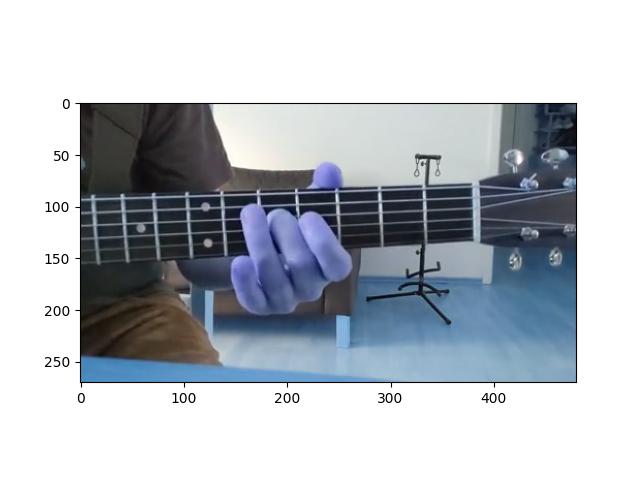

In [29]:
plt.imshow(image.permute(1,2,0).numpy().astype("int"))
plt.show()

In [30]:
label.shape,label.dtype

(torch.Size([4, 270, 480]), torch.float32)

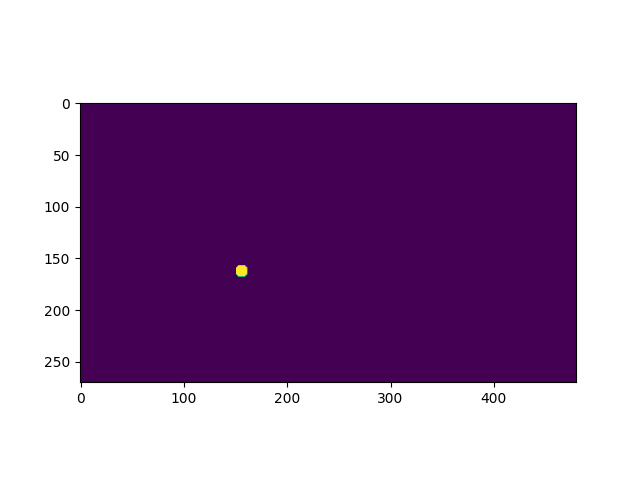

In [33]:
plt.imshow(label.permute(1,2,0).numpy().astype(int)[:,:,3])
plt.show()

In [34]:
coord

array([[223., 105.],
       [192., 107.],
       [169., 107.],
       [156., 162.]])

# Notebook 02

# Dataset inspection

We want to be able to look at our labeling to make sure it is correct.

If you find wrongly labeled images, just press `Delete frame` and it will be removed from the dataset.

Training a network with bad labeling affects the performance of the model.

In [35]:
from google.colab import output
output.enable_custom_widget_manager()

In [37]:
from unetTracker.unetGUI import ReviewDatasetGUI

In [38]:
dataset = UNetDataset(image_dir=project.image_dir, mask_dir=project.mask_dir, coordinate_dir=project.coordinate_dir, image_extension=project.image_extension)

In [39]:
len(dataset)

203

In [40]:
gui = ReviewDatasetGUI(project,dataset)

Output(layout=Layout(border='1px solid black'))

In [41]:
len(dataset)

203

# Notebook 03

# Data normalization


Data normalization means that we want to set the mean and std of each image channel to a set value.
Usually, the mean is set to 0 and standard deviation to 1.

1. This keeps the data in the range that the activation function is activated.
2. Also, it makes sure that the distribution in the 3 channels is similar. We want to have learning rate that is appropriate to the different channels.

Normalization should facilitate learning.

The strategy here is as follows:

1. Calculated the mean and standard deviation of the images channels in our dataset.
2. Apply this normalization to our transofrm pipeline when we get images from the dataset.
3. Apply this normalization when we get new images to process (assuming they are coming from the same distribution as those in the dataset).

In this notebook, we will calculate the mean and std of each channel and save the information in the project configuration file for later use.

In [42]:
from torch import optim
import torch
import torch.nn as nn
import albumentations as A

from unetTracker.unet import Unet

In [43]:
dataset = UNetDataset(image_dir=project.image_dir, mask_dir=project.mask_dir, coordinate_dir=project.coordinate_dir,
                      image_extension=project.image_extension)

In [44]:
len(dataset)

203

## Calculate means and standard deviation of each color channel

We have a function in the dataset class to do just this. It loads all images, calculates the mean and standard deviation per color channel, and returns them.

In [45]:
means,stds = dataset.get_normalization_values()

KeyboardInterrupt: 

In [ ]:
print("means:",means)
print("stds:", stds)

## Saving normalization values in the project configuration

We can save the normalization values in the project object and to the configuration file.

I am dividing the values by the maximum value for a pixel (usually 255).

The formula for normalization in the [Albumentations normalization](https://albumentations.ai/docs/api_reference/augmentations/transforms/) function is : `img = (img - mean * max_pixel_value) / (std * max_pixel_value)`

In [ ]:
project.set_normalization_values(means/255.0,stds/255.0)
project.normalization_values

In [ ]:
project.save_configuration()

In [ ]:
project.load_configuration()

## Apply normalization when training the network

You can apply normalization by setting the transform argument of the dataset.

Here is an example.

In [ ]:
means = project.normalization_values["means"]
stds = project.normalization_values["stds"]

transform = A.Compose([A.Normalize(mean=means, std=stds)])
transform

Here is one dataset without normalization and one with normalization.

In [ ]:
datasetNoNorm = UNetDataset(image_dir=project.image_dir,
                            mask_dir=project.mask_dir,
                            coordinate_dir=project.coordinate_dir,
                            image_extension=project.image_extension)
datasetWithNorm = UNetDataset(image_dir=project.image_dir,
                              mask_dir=project.mask_dir,
                              coordinate_dir=project.coordinate_dir,
                              transform=transform, # we pass our transform function to the UNetDataset object
                              image_extension=project.image_extension)

In [ ]:
imgNoNorm,_,_ = datasetNoNorm[0]
imgWithNorm,_,_ = datasetWithNorm[0]

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(6,3))
ax[0].imshow(imgNoNorm.permute(1,2,0)/255)
ax[0].set_title("No normalization")
ax[1].imshow(imgWithNorm.permute(1,2,0))
ax[1].set_title("With normalization")
plt.show()

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(6,3),layout="constrained")
ax[0].hist(imgNoNorm.flatten(),bins=50)
ax[0].set_xlabel("Pixel values")
ax[0].set_title("No normalization")
ax[1].hist(imgWithNorm.flatten(),bins=50)
ax[1].set_xlabel("Pixel values")
ax[1].set_title("With normalization")
plt.show()

# Notebook 04

# Create training and validation sets

When we label images, the images, masks, and object coordinates were saved in the `images`, `masks`, and `coordinates` directories.

In this Notebook, we want to create training and validation sets.

The train and validation sets will be saved within the `dataset` folder of the project.

It will create the following subdirectories
* `train_images`
* `train_masks`
* `train_coordinates`
* `val_images`
* `val_masks`
* `val_coordinates`


We will use the validation folders to estimate our model's accuracy on data it has not seen during training.

In [47]:
dataset = UNetDataset(image_dir=project.image_dir, mask_dir=project.mask_dir, coordinate_dir=project.coordinate_dir,image_extension=project.image_extension)

In [48]:
dataset.create_training_validation_dataset(train_image_dir = os.path.join(project.dataset_dir,"train_images"),
                                           train_mask_dir =  os.path.join(project.dataset_dir,"train_masks"),
                                           train_coordinate_dir = os.path.join(project.dataset_dir,"train_coordinates"),

                                           val_image_dir = os.path.join(project.dataset_dir,"val_images"),
                                           val_mask_dir =  os.path.join(project.dataset_dir,"val_masks"),
                                           val_coordinate_dir = os.path.join(project.dataset_dir,"val_coordinates"),

                                           test_ratio=0.10) # ratio of images assigned to the validation dataset, the rest goes to the training set.

Number of item in dataset: 203
Length of training set: 184
Length of validation set: 19
Actual test ratio: 0.094
Copying files to training and validation directories


We can use the same `UNetDataset` class to represent our training and validation datasets. They will pick images from different directories.

In [49]:
train_image_dir = os.path.join(project.dataset_dir,"train_images")
train_mask_dir =  os.path.join(project.dataset_dir,"train_masks")
train_coordinate_dir = os.path.join(project.dataset_dir,"train_coordinates")
trainDataset = UNetDataset(image_dir=train_image_dir,
                           mask_dir=train_mask_dir,
                           coordinate_dir=train_coordinate_dir,
                           image_extension=project.image_extension)
len(trainDataset)

184

In [50]:
val_image_dir = os.path.join(project.dataset_dir,"val_images")
val_mask_dir =  os.path.join(project.dataset_dir,"val_masks")
val_coordinate_dir = os.path.join(project.dataset_dir,"val_coordinates")
valDataset = UNetDataset(image_dir=val_image_dir,
                         mask_dir=val_mask_dir,
                         coordinate_dir=val_coordinate_dir,
                         image_extension=project.image_extension)
len(valDataset)

19

We now have a training and validation datasets.

# Notebook 05

# Data augmentation

Data augmentation is when we modify our images and masks when we load them from files using the dataset object. This process is stochastic, so the images loaded in each training epoch differ slightly.

The main reason one uses data augmentation is to augment the generalization of our model to new images. By changing the images in each training epoch, we force the model to learn more generalizable features instead of learning specific features unique to each labeled image.

With data augmentation, you don't need to label as many images as without data augmentation.

I used the [Albumentations](https://albumentations.ai/) library to implement data augmentation. One can create a pipeline to process our images when they are loaded from files. The library can work with image-mask pairs used for segmentation.

The normalization of our images (set mean and std of each channel to 0 and 1) can also be performed by the data augmentation pipeline. See the notebook on data normalization.

Below, I am using four transformations. We can set the probability that this transformation is applied using the `p` argument. You can set it in the project configuration file. Alternatively, you can edit the code below.

### Tips

* If you track left/right body parts, you probably don't want to flip your images. This would mean setting 'augmentation_HorizontalFlipProb': 0.0 in your `config.yalm` file.


In [51]:
import albumentations as A
from unetTracker.dataset import UNetDataset

In [52]:
original_height = project.image_size[0]
original_width = project.image_size[1]
means = project.normalization_values["means"]
stds = project.normalization_values["stds"]

trainTransform = A.Compose([
                    A.RandomSizedCrop(min_max_height=(original_height-50, original_height),
                                      w2h_ratio=original_width/original_height,height=original_height, width=original_width,
                                      p=project.augmentation_RandomSizedCropProb),
                    A.HorizontalFlip(p=project.augmentation_HorizontalFlipProb),
                    A.Rotate (limit=30,border_mode=cv2.BORDER_CONSTANT,p=project.augmentation_RotateProb),

                    A.Normalize(mean=means, std=stds)
])

valTransform = A.Compose([
                    A.Normalize(mean=means, std=stds)
])


print(trainTransform)
print(valTransform)

Compose([
  RandomSizedCrop(always_apply=False, p=1.0, min_max_height=(220, 270), height=270, width=480, w2h_ratio=1.7777777777777777, interpolation=1),
  HorizontalFlip(always_apply=False, p=0.5),
  Rotate(always_apply=False, p=0.3, limit=(-30, 30), interpolation=1, border_mode=0, value=None, mask_value=None, rotate_method='largest_box', crop_border=False),
  Normalize(always_apply=False, p=1.0, mean=[0.40664952993392944, 0.4527093172073364, 0.5142642259597778], std=[0.2394399791955948, 0.2509937286376953, 0.26815035939216614], max_pixel_value=255.0),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})
Compose([
  Normalize(always_apply=False, p=1.0, mean=[0.40664952993392944, 0.4527093172073364, 0.5142642259597778], std=[0.2394399791955948, 0.2509937286376953, 0.26815035939216614], max_pixel_value=255.0),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})


We don't want to apply data augmentation on the validation set.

We can save the transformation in a `augmentation` directory inside our project directory.

We will be able to load the data augmentation pipeline from files when training the model.

In [53]:
project.augmentation_dir
if os.path.exists(project.augmentation_dir) == False:
    os.mkdir(project.augmentation_dir)

In [54]:
fileName = os.path.join(project.augmentation_dir,"trainTransform")
print("Saving trainTransform as", fileName)
pickle.dump( trainTransform, open( fileName, "wb" ))


Saving trainTransform as /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/augmentation/trainTransform


In [55]:
fileName = os.path.join(project.augmentation_dir,"valTransform")
print("Saving trainTransform as", fileName)
pickle.dump( valTransform, open( fileName, "wb" ))


Saving trainTransform as /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/augmentation/valTransform


## Visualize the effect of data augmentation

We can create two datasets pointing to the same directory. Only one dataset will perform data augmentation. We can then compare the image with and without data augmentation.

In [56]:
train_image_dir = os.path.join(project.dataset_dir,"train_images")
train_mask_dir =  os.path.join(project.dataset_dir,"train_masks")
train_coordinate_dir = os.path.join(project.dataset_dir,"train_coordinates")
dataset_noAugmentation = UNetDataset(image_dir=train_image_dir,
                           mask_dir=train_mask_dir,
                           coordinate_dir=train_coordinate_dir,
                           transform=valTransform, # we pass our transform function to the UNetDataset object
                           image_extension=project.image_extension)
dataset_withAugmentation = UNetDataset(image_dir=train_image_dir,
                           mask_dir=train_mask_dir,
                           coordinate_dir=train_coordinate_dir,
                           transform=trainTransform, # we pass our transform function to the UNetDataset object
                           image_extension=project.image_extension)

In [57]:
imageNoAugmentation, _, _ = dataset_noAugmentation[0]
imageWithAugmentation, _, _ = dataset_withAugmentation[0]

In [58]:
imageNoAugmentation.mean(),imageWithAugmentation.mean()

(tensor(-0.0038), tensor(-0.0307))

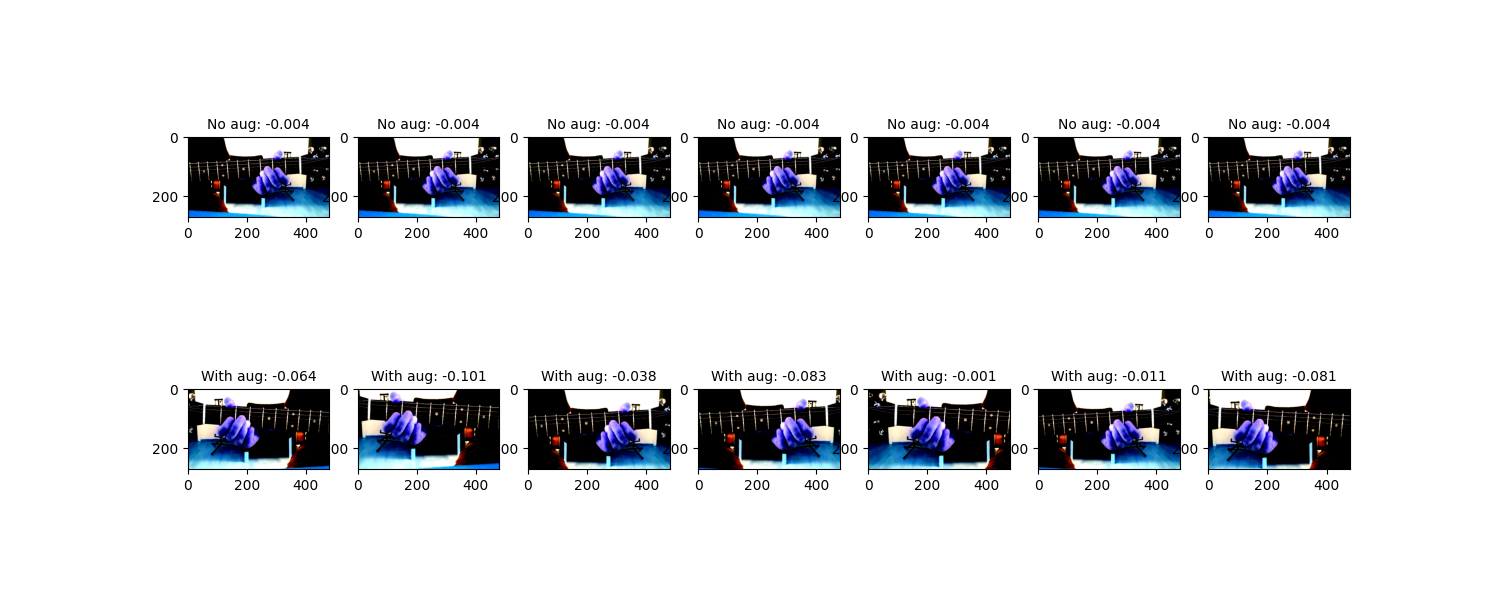

In [59]:
fig, axs = plt.subplots(2, 7,figsize=(15,6))
for i in range(7):
    imageNoAugmentation, _, _ = dataset_noAugmentation[0]
    imageWithAugmentation, _, _ = dataset_withAugmentation[0]
    axs[0,i].imshow(imageNoAugmentation.permute(1,2,0))
    axs[0,i].set_title("No aug: {:.3f}".format(imageNoAugmentation.mean().item()),fontsize=10)
    axs[1,i].imshow(imageWithAugmentation.permute(1,2,0))
    axs[1,i].set_title("With aug: {:.3f}".format(imageWithAugmentation.mean().item()),fontsize=10)

# Notebook 6

# Train U-Net

This notebook will guide you through the steps to train your unet-tracker model on Google colab.

With approximately 200-400 images in the training set, I trained for 200 epochs and got reasonable results for face tracking.

## GPU access

You will need to get a Runtime with GPU access. Click on Runtime/Change runtime type. Select GPU as hardware accelerator.

In [4]:
import torch
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from torch import optim
import torch.nn as nn
from datetime import datetime
import albumentations as A
import cv2
import os
import pickle

from unetTracker.trackingProject import TrackingProject
from unetTracker.dataset import UNetDataset
from unetTracker.unet import Unet
from unetTracker.coordinatesFromSegmentationMask import CoordinatesFromSegmentationMask
from unetTracker.utils import check_accuracy

In [5]:
# this will run the code in the setup_project.py and create a variable called `project`
%run "/content/drive/My Drive/dsfolder/setup_project.py"

Project directory: /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker
Getting configuration from config file. Values from config file will be used.
Loading /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/config.yalm
{'augmentation_HorizontalFlipProb': 0.5, 'augmentation_RandomBrightnessContrastProb': 0.2, 'augmentation_RandomSizedCropProb': 1.0, 'augmentation_RotateProb': 0.3, 'image_extension': '.png', 'image_size': [270, 480], 'labeling_ImageEnlargeFactor': 2.0, 'name': 'finger_tracker', 'normalization_values': {'means': [0.40664952993392944, 0.4527093172073364, 0.5142642259597778], 'stds': [0.2394399791955948, 0.2509937286376953, 0.26815035939216614]}, 'object_colors': [(0.0, 0.0, 255.0), (255.0, 0.0, 0.0), (255.0, 255.0, 0.0), (240.0, 255.0, 255.0)], 'objects': ['f1', 'f2', 'f3', 'f4'], 'target_radius': 6, 'unet_features': [64, 128, 256, 512]}


We can check if torch has access to a GPU.

In [6]:
torch.cuda.is_available(),torch.cuda.get_device_name(0)

(True, 'Tesla T4')

## Hyperparameters

You can probably leave most of these parameters as they are.

If it is the first time you train your model, you can set `LOAD_MODEL` to False. If you only want to refine your model quickly, you can set it to True.

As a starting point, you can use ~100 epochs if you have between 400 to 1000 images.

In [7]:
LEARNING_RATE=1e-4
DEVICE = (torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu"))
BATCH_SIZE=4
NUM_EPOCHS = 100
NUM_WORKERS = 2
OUTPUT_CHANNELS = len(project.object_list)
IMAGE_HEIGHT = project.image_size[0]
IMAGE_WIDTH = project.image_size[1]
PIN_MEMORY = True
LOAD_MODEL = True # If this is the first time you train the model, set LOAD_MODEL to False
TRAIN_IMAGE_DIR = os.path.join(project.dataset_dir,"train_images")
TRAIN_MASK_DIR =  os.path.join(project.dataset_dir,"train_masks")
TRAIN_COORDINATE_DIR = os.path.join(project.dataset_dir,"train_coordinates")
VAL_IMAGE_DIR = os.path.join(project.dataset_dir,"val_images")
VAL_MASK_DIR =  os.path.join(project.dataset_dir,"val_masks")
VAL_COORDINATE_DIR = os.path.join(project.dataset_dir,"val_coordinates")

## Model, loss, and optimizer

In [8]:
model = Unet(in_channels=3, out_channels=OUTPUT_CHANNELS).to(DEVICE)
if LOAD_MODEL:
    project.load_model(model)

# set the model in train mode
model.train()

loss_fn = nn.BCEWithLogitsLoss() # not doing sigmoid on the output of the model, so use this, if we had more classes (objects) we would use change out_chan and cross_entropy_loss as loss_fn
optimizer= optim.Adam(model.parameters(),lr=LEARNING_RATE)
scaler = torch.cuda.amp.GradScaler()

/content/unetTracker/unetTracker/trackingProject.py:127: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(self.model_fn))
/tmp/ipykernel_1776/1

## Data augmentation and normalization



In [9]:
fileName = os.path.join(project.augmentation_dir,"trainTransform")
print("Loading trainTransform from", fileName)
trainTransform=pickle.load(open(fileName,"rb" ))

fileName = os.path.join(project.augmentation_dir,"valTransform")
print("Loading valTransform from", fileName)
valTransform=pickle.load(open(fileName, "rb" ))

Loading trainTransform from /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/augmentation/trainTransform
Loading valTransform from /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/augmentation/valTransform


## Datasets and DataLoaders

In [10]:
trainDataset = UNetDataset(TRAIN_IMAGE_DIR, TRAIN_MASK_DIR,TRAIN_COORDINATE_DIR, transform=trainTransform)
valDataset = UNetDataset(VAL_IMAGE_DIR, VAL_MASK_DIR,VAL_COORDINATE_DIR, transform=valTransform)
trainLoader = DataLoader(trainDataset,shuffle=True,batch_size=BATCH_SIZE, num_workers=NUM_WORKERS,pin_memory=PIN_MEMORY)
valLoader = DataLoader(valDataset,shuffle=False,batch_size=BATCH_SIZE, num_workers=NUM_WORKERS,pin_memory = PIN_MEMORY)

In [11]:
imgs, masks, _ = next(iter(trainLoader))
imgs.shape, masks.shape

(torch.Size([4, 3, 270, 480]), torch.Size([4, 4, 270, 480]))

There is a lot of black because half of our pixels are below 0, on average.


# Save and load checkpoint

In [12]:
def save_checkpoint(state, filename = "my_checkpoint.pth.tar"):
    #print("Saving checkpoint")
    torch.save(state,filename)

## Training loop

This is where we train our model. Every few epochs, the performance of the model will be evaluated on the validation set.

The task of the model is to learn to predict your masks. For each image in the dataset, you created a set of masks when you labelled the image. For one image, there is one mask per body part. The mask has the same size as your image.  Most pixels in the mask are set to 0, but the circle centered on the body part is set to 1.

The task of the model is to output values for each mask that ressemble the mask you created while labeling the images. The loss function just measure the similarity between your masks and the output of the model.

It ususally takes a 40-60 epochs before the model starts to mark the labeled positive pixels of your mask as positive pixels.

During training, you should have a look at the printed output. If your model is learning, the loss will decrease over time.

In [13]:
def train_fn(loader,model,optimizer,loss_fn,scaler,epoch,total_epochs):
    """
    One epoch of training
    """
    loop = tqdm(loader)
    for batch_idx, (data,targets,_) in enumerate(loop):
        data = data.to(device=DEVICE)
        targets = targets.to(device=DEVICE)

        # forward
        with torch.cuda.amp.autocast():
            predictions = model(data)
            loss = loss_fn(predictions,targets)


        # backward
        optimizer.zero_grad()
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        # update tqdm loop
        loop.set_postfix_str("loss: {:.7f}, epoch: {:d}/{:d}".format(loss.item(),epoch,total_epochs))


In [14]:
startTime = datetime.now()
print("Starting time:",startTime)
for epoch in range(NUM_EPOCHS):

    train_fn(trainLoader,model,optimizer,loss_fn,scaler,epoch,NUM_EPOCHS)

    if epoch % 5 == 0 :
        # save model
        checkpoint = {
            "state_dict": model.state_dict(),
            "optimizer": optimizer.state_dict()}
        save_checkpoint(checkpoint,filename=os.path.join(project.models_dir,"my_checkpoint.pth.tar"))

        # check accuracy
        print("Performance on validation set")
        check_accuracy(model,valLoader,DEVICE)

endTime=datetime.now()
print("End time:",endTime)
print("{} epochs, duration:".format(NUM_EPOCHS), endTime-startTime)

Starting time: 2024-12-12 20:20:16.008727


  0%|          | 0/46 [00:00<?, ?it/s]/tmp/ipykernel_1776/2801725683.py:11: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
100%|██████████| 46/46 [00:53<00:00,  1.17s/it, loss: 0.0009561, epoch: 0/100]


Performance on validation set
Number of positive pixels predicted: 6528.0
Number of positive pixels in masks: 8175.0
Percentage of positive pixels predicted: 0.066
Percentage of positive pixels in masks: 0.083
Accuracy: 99.933
Dice score: 0.553
Mask pixels detected (True positives): 49.590%
False positives: 37.898%
Mean distance: 4.531191965636076


100%|██████████| 46/46 [00:10<00:00,  4.46it/s, loss: 0.0010924, epoch: 5/100]


Performance on validation set
Number of positive pixels predicted: 7465.0
Number of positive pixels in masks: 8175.0
Percentage of positive pixels predicted: 0.076
Percentage of positive pixels in masks: 0.083
Accuracy: 99.931
Dice score: 0.567
Mask pixels detected (True positives): 54.055%
False positives: 40.804%
Mean distance: 3.778283966244717


100%|██████████| 46/46 [00:10<00:00,  4.56it/s, loss: 0.0011561, epoch: 10/100]


Performance on validation set
Number of positive pixels predicted: 8198.0
Number of positive pixels in masks: 8175.0
Percentage of positive pixels predicted: 0.083
Percentage of positive pixels in masks: 0.083
Accuracy: 99.933
Dice score: 0.596
Mask pixels detected (True positives): 59.645%
False positives: 40.522%
Mean distance: 4.318311462041395


 33%|███▎      | 15/46 [00:03<00:07,  3.94it/s, loss: 0.0008886, epoch: 11/100]


KeyboardInterrupt: 

Once your model starts to predict positive pixels, the output will contain the a few values that helps you track how your model is doing.

* Dice score: a common measure to measure the performace of image segmentation models. [External link](https://medium.com/mlearning-ai/understanding-evaluation-metrics-in-medical-image-segmentation-d289a373a3f)
* Mask pixels detected: percentage of the positive pixels in the masks that are predicted as positive by the model.
* False positive: percentage of the pixels that are predicted as positive by the models that are negative pixels in your masks.
* Mean distance: Mean distance in pixels between the coordinates you labeled and the coordinated calculated from the model output.



In [15]:
project.save_model(model)

saving model state dict to /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/models/UNet.pt
2024-12-12 20:23:25.523212


# Notebook 7

# Segmentation to coordinates

This notebook explains how we can go from image segmentation to object coordinates.

If you run out of CUDA memory, make sure you shutdown the python kernel of the other notebook.

In [16]:
import torch
import albumentations as A
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2
from unetTracker.trackingProject import TrackingProject
from unetTracker.dataset import UNetDataset
from unetTracker.unet import Unet

Get some predictions from the model.

In [17]:
VAL_IMAGE_DIR = os.path.join(project.dataset_dir,"val_images")
VAL_MASK_DIR =  os.path.join(project.dataset_dir,"val_masks")
VAL_COORDINATE_DIR = os.path.join(project.dataset_dir,"val_coordinates")
DEVICE = (torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu"))

In [18]:
fileName = os.path.join(project.augmentation_dir,"valTransform")
print("Loading valTransform from", fileName)
valTransform=pickle.load(open(fileName, "rb" ))
print(valTransform)

Loading valTransform from /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/augmentation/valTransform
Compose([
  Normalize(always_apply=False, p=1.0, mean=[0.40664952993392944, 0.4527093172073364, 0.5142642259597778], std=[0.2394399791955948, 0.2509937286376953, 0.26815035939216614], max_pixel_value=255.0),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})


In [19]:
valDataset = UNetDataset(VAL_IMAGE_DIR, VAL_MASK_DIR,VAL_COORDINATE_DIR, transform=valTransform,image_extension=project.image_extension)
dataset = UNetDataset(VAL_IMAGE_DIR, VAL_MASK_DIR,VAL_COORDINATE_DIR, transform=None,image_extension=project.image_extension)

In [20]:
model = Unet(in_channels=3, out_channels=len(project.object_list)).to(DEVICE)
project.load_model(model)
a = model.eval()

Let's get an item from the validation dataset

In [21]:
imageIndex=6
image,mask,coord = valDataset[imageIndex]
imageOri,_,_ =dataset[imageIndex]

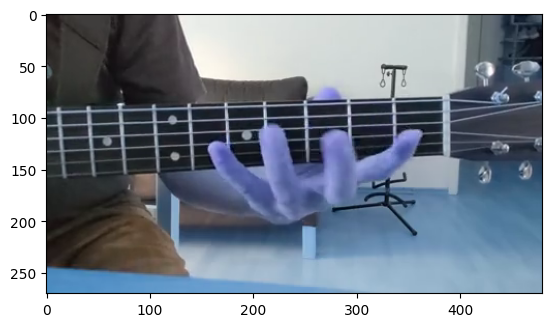

In [22]:
imageOri =imageOri.permute(1,2,0).numpy()
imageOri = imageOri.astype(np.uint8)
plt.imshow(imageOri)

In [23]:
img = image.permute(1,2,0).numpy() #
msk = mask.numpy()

### Image and masks for an item of the validation set

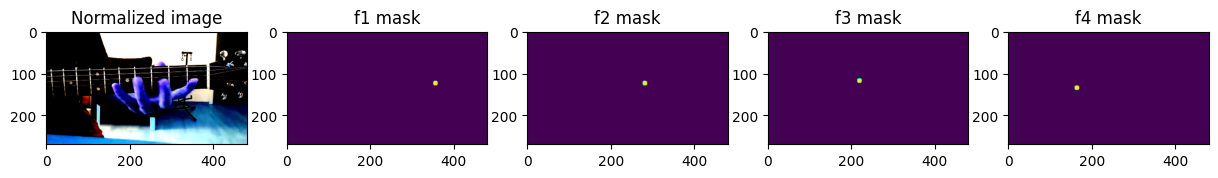

In [24]:
fig, ax = plt.subplots(1,msk.shape[0]+1,figsize=((msk.shape[0]+1)*3,3))
ax[0].imshow(img)
ax[0].set_title("Normalized image")
for i in range(msk.shape[0]):
    ax[i+1].imshow(msk[i])
    ax[i+1].set_title(project.object_list[i]+" mask")

### Image and mask predictions of an item of the validation set
Let's get the model output for this image.

If you use [torch.nn.BCEWithLogitsLoss](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html), you should apply a sigmoid function to the output as it is usually applied when calculating the loss.

The sigmoid function limits the range from 0 to 1.

In [25]:
%%time

image,mask,coord = valDataset[imageIndex]
image = image.unsqueeze(0).to(DEVICE)
output = torch.sigmoid(model(image))
output = output.detach().cpu().numpy()

CPU times: user 64 ms, sys: 2.05 ms, total: 66 ms
Wall time: 85.8 ms


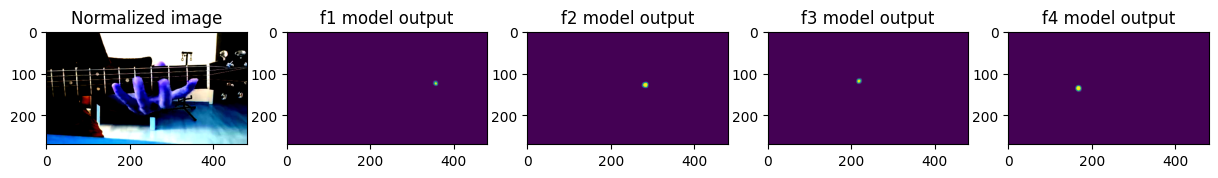

In [26]:
fig, ax = plt.subplots(1,output.shape[1]+1,figsize=((output.shape[1]+1)*3,3))
ax[0].imshow(img)
ax[0].set_title("Normalized image")
for i in range(output.shape[1]):
    ax[i+1].imshow(output[0,i])
    ax[i+1].set_title(project.object_list[i]+" model output")

## Extracting coordinate out of the mask

A detected object appears as a bright blob in a dark background.

We can use the cv2.SimpleBlobDetector to detect the objects.

In [27]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 30 # 100 # between 400 and 500 is the decision point
detector = cv2.SimpleBlobDetector_create(params)

In [28]:
blobs = imageOri.astype(np.uint8)
nObjects = output.shape[1]
pred = np.empty((output.shape[0],nObjects,3)) # x, y, probability
pred[:,:,:] = np.nan
pred[:,:,2] = output.reshape(nObjects,-1).max(axis=1) # maximal value in each object mask

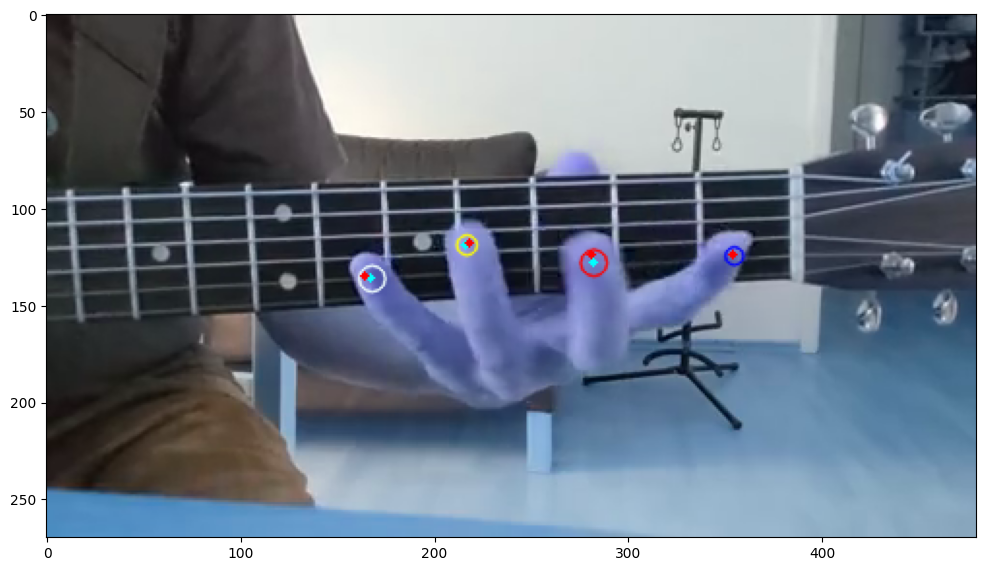

[[[354.81005859 124.73070526   0.81756437]
  [282.31445312 128.29075623   0.99720323]
  [216.83239746 119.10353851   0.94495547]
  [167.87062073 136.41946411   0.9980135 ]]]
[[354. 124.]
 [281. 124.]
 [218. 118.]
 [164. 135.]]


array([1.09092855, 4.48758019, 1.60657802, 4.12269125])

In [29]:
for item in range(1):
    for objectIndex in range(len(project.object_list)):

        out = output[item]
        outputT = np.expand_dims((out[objectIndex]*255).astype(np.uint8),2) # get output in unsigned int 8 format, values ranging from 0 to 255
        outputT= 255-outputT # reverse values because the SimpleBlobDetector is looking for dark blob


        keypoints = detector.detect(outputT)
        if keypoints:
            blank = np.zeros((1, 1))
            blobs = cv2.drawKeypoints(blobs, keypoints, blank, project.object_colors[objectIndex],cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
            # find the largest blob
            largest_size=0
            pt = None
            for k in keypoints:
                if k.size>largest_size:
                    pt = k.pt
            pred[item,objectIndex,0] = pt[0]
            pred[item,objectIndex,1] = pt[1]
            cv2.circle(blobs,(int(pt[0]),int(pt[1])), 2, (0,255,255), -1)
            cv2.circle(blobs,(int(coord[objectIndex,0]),int(coord[objectIndex,1])), 2, (255,0,0), -1)
    plt.figure(figsize=(12,12))
    plt.imshow(blobs)
    plt.show()

print(pred)
print(coord)
# distance between predicted coordinates and labeled coordinates
np.sqrt(np.sum((coord-pred[0,:,0:2])**2,axis=1))

## CoordinatesFromSegmentationMask object
We have a class that will extract the predicted coordinates given an output.

In [30]:
image,mask,coord = valDataset[imageIndex]
image = image.unsqueeze(0).to(DEVICE)
output = torch.sigmoid(model(image))
output = output.detach().cpu().numpy()

In [31]:
from unetTracker.coordinatesFromSegmentationMask import CoordinatesFromSegmentationMask
cDetector = CoordinatesFromSegmentationMask()

In [32]:
pred = cDetector.detect(output)

In [33]:
pred , coord

(array([[[354.84158325, 124.81762695,   0.81756437],
         [282.35870361, 128.25643921,   0.99720323],
         [216.81874084, 119.10540771,   0.94495547],
         [167.86175537, 136.39642334,   0.9980135 ]]]),
 array([[354., 124.],
        [281., 124.],
        [218., 118.],
        [164., 135.]]))

## Processing image from a video

If the images are coming from a video, we need to process them the same way we processed the images of the dataset. We do not to apply any translation, cropping, etc that is usually associated with data augmentation. In our project, the transformation applied to the validation set can work.

In [34]:
video_fn = '/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/videos/human_hand.mp4'

In [35]:
BGR2RGBTransformation=False

detector = CoordinatesFromSegmentationMask()

cap = cv2.VideoCapture(video_fn)
if (cap.isOpened()== False):
    raise ValueError("Error opening video file")

video_length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("Number of frames in {}: {}".format(video_fn,video_length))

n = 10
sel_frames = np.random.choice(np.arange(video_length),size=n, replace=False)
sel_frames.sort()


for i in sel_frames:
    print("frame",i)
    cap.set(cv2.CAP_PROP_POS_FRAMES, i)

    ret, image = cap.read()

    if ret == False:
        raise ValueError("Error reading video frame")

    input = image.astype(np.float32)
    if BGR2RGBTransformation:
        input = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)

    normInput = valTransform(image=input)["image"] # normalize

    # transform to torch tensor, send to gpu, permute the dimensions and unsqueeze to make a batch
    input = torch.tensor(normInput).to(DEVICE).permute(2,0,1).unsqueeze(0).float()

    # model prediction
    output = torch.sigmoid(model(input))
    # batch to image, move to cpu memory, transform to numpy array
    output = output.to("cpu").detach().numpy()

    # draw output onto image
    outputThreshold = (output[0]>0.5).astype("float")

    for j in range(output.shape[1]): # body parts
        idx=(outputThreshold[j]==1.0)
        for c in range(3):
            image[idx,c]=project.object_colors[j][c]

    fig, ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].imshow(image)
    ax[1].imshow(normInput)
    plt.show()



    fig, ax = plt.subplots(1,output.shape[1],figsize=((output.shape[1])*6,6))
    for j in range(output.shape[1]):
        ax[j].imshow(output[0,j])
        ax[j].set_title("{}, max:{:0.3f}".format(project.object_list[j],output[0,j].max()))

    coord = detector.detect(output) # coord has shape batchsize,objects,3
    for j in range(coord.shape[1]):
        circle1 = plt.Circle((coord[0,j,0], coord[0,j,1]), 50, color='r',alpha=0.1)
        ax[j].add_patch(circle1)


    print(coord)


cap.release()

Output hidden; open in https://colab.research.google.com to view.

# Notebook 10

# Track videos with your trained network

Once you have a well-trained network, you can use it to extract the position of the different objects in a video.

In [36]:
import torch
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from unetTracker.trackingProject import TrackingProject
from unetTracker.dataset import UNetDataset
from unetTracker.unet import Unet
from unetTracker.utils import extract_object_position_from_video

In [37]:
dataset = UNetDataset(image_dir=project.image_dir, mask_dir=project.mask_dir, coordinate_dir=project.coordinate_dir)

In [38]:
device = (torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu"))
print("Training on device {}".format(device))

Training on device cuda


In [39]:
model = Unet(in_channels=3,out_channels=len(project.object_list)).to(device)
project.load_model(model)
_ = model.eval()

In [40]:
fileName = os.path.join(project.augmentation_dir,"valTransform")
print("Loading valTransform from", fileName)
valTransform=pickle.load(open(fileName, "rb" ))

Loading valTransform from /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/augmentation/valTransform


In [ ]:
valTransform

Compose([
  Normalize(always_apply=False, p=1.0, mean=[0.40664952993392944, 0.4527093172073364, 0.5142642259597778], std=[0.2394399791955948, 0.2509937286376953, 0.26815035939216614], max_pixel_value=255.0),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

The transformation should only include the normalization. No translation, flip or cropping.

In [56]:
video_fn = '/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/videos/human_hand.mp4'
if os.path.exists(video_fn):
  print("We can access the video file.")
else:
  raise IOError("Problem accessing {}".format(video_fn))

We can access the video file.


In [42]:
df = extract_object_position_from_video(project=project,transform=valTransform,
                                        model=model,device=device,
                                        video_fn=video_fn,blobMinArea=10,
                                        plotData=False,
                                        #nFrames=10000,
                                        #startFrameIndex=15*60*3,
                                        BGR2RGBTransformation=False)

Number of frames in /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/videos/human_hand.mp4: 5795
Processing 5795 frames from index 0


100%|██████████| 5795/5795 [05:36<00:00, 17.23it/s]


In [43]:
tracking_fn = (os.path.splitext(video_fn)[0]) + ".csv"
print("Saving ",tracking_fn)
df.to_csv(tracking_fn,index=False)

Saving  /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/videos/human_hand.csv


In [44]:
df = pd.read_csv(tracking_fn)
df

,f1_x,f1_y,f1_p,f2_x,f2_y,f2_p,f3_x,f3_y,f3_p,f4_x,f4_y,f4_p
0,NaN,NaN,0.000884,NaN,NaN,0.001545,NaN,NaN,0.034051,NaN,NaN,0.000448
1,NaN,NaN,0.000862,NaN,NaN,0.001531,NaN,NaN,0.034209,NaN,NaN,0.000449
2,NaN,NaN,0.000864,NaN,NaN,0.001538,NaN,NaN,0.034141,NaN,NaN,0.000446
3,NaN,NaN,0.000797,NaN,NaN,0.001862,NaN,NaN,0.128466,NaN,NaN,0.001304
4,NaN,NaN,0.000797,NaN,NaN,0.001861,NaN,NaN,0.128481,NaN,NaN,0.001311
...,...,...,...,...,...,...,...,...,...,...,...,...
5790,329.663940,133.987808,0.981259,284.741516,120.120018,0.997506,259.658630,118.869461,0.992648,227.973129,132.926010,0.893692
5791,329.773132,134.198929,0.982000,285.044586,120.396927,0.996084,259.927643,119.015587,0.990825,228.551178,132.923981,0.881835
5792,329.771271,134.199036,0.981989,285.040070,120.363617,0.996138,259.927643,119.015587,0.990820,228.533691,132.911560,0.880881
5793,329.772766,134.196472,0.982028,285.026672,120.405220,0.995931,259.959015,119.175415,0.991255,228.569687,132.952896,0.885552


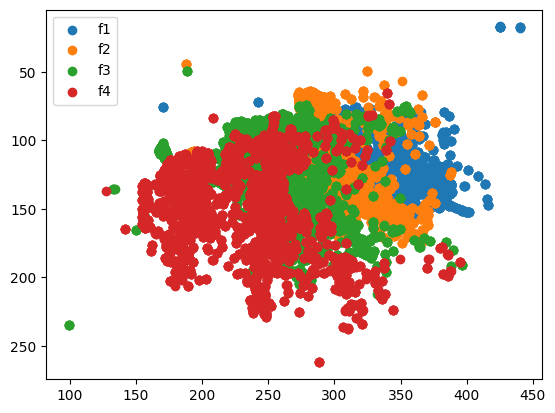

In [45]:
for obj in project.object_list:
    plt.scatter(df[f"{obj}_x"],df[f"{obj}_y"],label=obj)
plt.ylim(max(plt.ylim()), min(plt.ylim()))
plt.legend()


In [46]:
obj = project.object_list[0]
cName = f"{obj}_x"
print("Number of Nan:", np.sum(np.isnan(df[cName])))
print("percentage of Nan: {:.2f}%".format(np.sum(np.isnan(df[cName]))/len(df[cName])*100))

Number of Nan: 246
percentage of Nan: 4.25%


We can then create a video with the labels.

In [58]:
label_fn = (os.path.splitext(video_fn)[0]) + "_label3.avi"
print(video_fn, tracking_fn,label_fn)


/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/videos/human_hand.mp4 /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/videos/human_hand.csv /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/videos/human_hand_label3.avi


In [59]:
from unetTracker.utils import label_video

In [60]:
label_video(project,video_fn,tracking_fn,label_fn)

Number of frames: 5795


100%|██████████| 5795/5795 [00:15<00:00, 363.22it/s]


# Notebook 11

# Extract problematic frames from a label video

Let's say you have trained a model, analyzed and labeled video. By watching the label video, you might notice that you model is making some mistakes.

You can fix this by extracing the problematic frames, manually label the body parts and adding these images to your dataset, and training your model further.

This notebook helps with extracting new images for which you model is not performing well.

In [61]:

%matplotlib widget
from unetTracker.dataset import UNetDataset
from unetTracker.unetGUI import LabelFromImagesGUI, SelectImagesFromLabeledVideoGUI

In [62]:
dataset = UNetDataset(image_dir=project.image_dir, mask_dir=project.mask_dir, coordinate_dir=project.coordinate_dir,
                      image_extension=project.image_extension)
print("Number of images in the dataset:",len(dataset))

Number of images in the dataset: 203


In [63]:
video_fn = '/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/videos/human_hand.mp4'
label_fn = (os.path.splitext(video_fn)[0]) + "_label3.avi"
print(video_fn, label_fn)

/content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/videos/human_hand.mp4 /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/videos/human_hand_label3.avi


In [64]:
for fn in [video_fn,label_fn]:
    if os.path.exists(fn):
        print("Video file {} exist".format(fn))
    else:
        raise IOError("Video file {} does not exist".format(fn))

Video file /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/videos/human_hand.mp4 exist
Video file /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/videos/human_hand_label3.avi exist


In [65]:
from google.colab import output
output.enable_custom_widget_manager()

In [66]:
myGui = SelectImagesFromLabeledVideoGUI(label_fn,
                                project)
display(myGui)

SelectImagesFromLabeledVideoGUI(children=(HBox(children=(Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x0…

In [67]:
myList = myGui.frame_list
print(len(myList))
myList[:10]

1


[460]

In [ ]:
extracted_frame_dir = project.project_dir+"/extracted_frames/" # directory where the extracted images will be saved
frame_info_file = extracted_frame_dir+"frame_info.csv" # file where the source of the image is stored



dataset.extract_frames_from_video(video_fn = video_fn,
                                  frame_dir = extracted_frame_dir,
                                  image_size = project.image_size,
                                  selected_frames = myList,
                                  frame_info_file = frame_info_file)

video length: 5795, image size: 270h 480w
Extracting frames: [322, 336, 342, 349, 364, 378, 508, 558, 564, 578, 581, 608, 614, 783, 827, 841, 950, 966, 1087, 1091, 1143, 1189, 1212, 1240, 1332, 1345, 1439, 1519, 1538, 1576, 1600, 1619, 1627, 1730, 1735, 1755, 1776, 1827] to /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/
Saving image info to /content/drive/My Drive/dsfolder/trackingProjects/finger_tracker/extracted_frames/frame_info.csv


In [ ]:
LabelFromImagesGUI(image_dir=extracted_frame_dir,
                   frame_info_file=frame_info_file,
                   project=project,dataset=dataset)

frame.shape: (270, 480, 3)
68e83520-9119-11ee-bc83-0242ac1c000c.png


LabelFromImagesGUI(children=(HTML(value='Event info'), HBox(children=(Label(value='Objects:'), RadioButtons(la…

In [ ]:
len(dataset)

200

Now that you have added problematic frames to your dataset, you can use them to train your network further.

You will have to go through Notebooks 04_ to 06_ to retrain your network.